In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing all necessary libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import zipfile
import os
import random
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pathlib

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (2).zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "/content/Tobacco3482-jpg/",
                            train_size = 0.60,
                            test_size = 0.20,
                            val_size = 0.20):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names

In [ ]:
split_dir_to_train_test_val()

Folder Form. Train data copied. 259 files
Folder Form. Test data copied. 86 files
Folder Form. Validation data copied. 87 files
Folder Note. Train data copied. 121 files
Folder Note. Test data copied. 40 files
Folder Note. Validation data copied. 41 files
Folder Letter. Train data copied. 340 files
Folder Letter. Test data copied. 114 files
Folder Letter. Validation data copied. 114 files
Folder Scientific. Train data copied. 157 files
Folder Scientific. Test data copied. 52 files
Folder Scientific. Validation data copied. 53 files
Folder Memo. Train data copied. 372 files
Folder Memo. Test data copied. 124 files
Folder Memo. Validation data copied. 125 files
Folder Email. Train data copied. 360 files
Folder Email. Test data copied. 120 files
Folder Email. Validation data copied. 120 files
Folder Resume. Train data copied. 72 files
Folder Resume. Test data copied. 24 files
Folder Resume. Validation data copied. 25 files
Folder ADVE. Train data copied. 138 files
Folder ADVE. Test data c

In [ ]:
class_names = get_class_names_from_folder('/content/files/train')
print(class_names)
print(len(class_names))

['ADVE' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report' 'Resume'
 'Scientific']
10


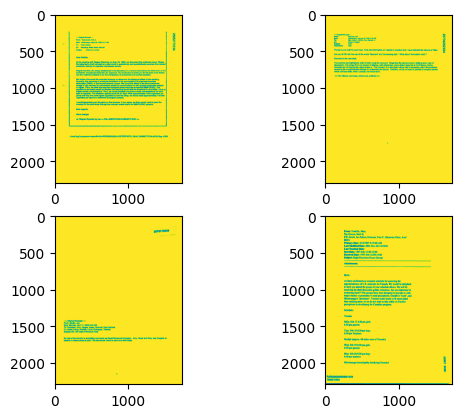

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 4)
  images = []
  for i in range(4):
    img = mpimg.imread(image_dir + "/" + random_image[i])
    images.append(img)
  f, axarr = plt.subplots(2,2)
  axarr[0,0].imshow(images[0])
  axarr[0,1].imshow(images[1])
  axarr[1,0].imshow(images[2])
  axarr[1,1].imshow(images[3])


  # return img

visualize_random_image("files/test/", random.choice(class_names))

# Removing all the dodgy image files

In [ ]:
import math
col_range = [math.inf,-math.inf]
row_range = [math.inf,-math.inf]

folders = ['train/','test/','validation/']
for folder in folders :
  for class_name in class_names:
    image_dir = "files/"+ folder + class_name
    for image in os.listdir(image_dir):
      if not (image.endswith('.jpg') or image.endswith('.jpeg') or image.endswith('.png')):
        os.remove(image_dir + "/" + image)
        continue
      img = mpimg.imread(image_dir + "/" + image)
      col_range[0] = min(col_range[0],img.shape[1])
      col_range[1] = max(col_range[1],img.shape[1])
      row_range[0] = min(row_range[0],img.shape[0])
      row_range[1] = max(row_range[1],img.shape[0])


In [ ]:
print("The number of rows range = ", row_range)
print("The number of columns range = ", col_range)

The number of rows range =  [1089, 4400]
The number of columns range =  [817, 3520]


### For train set :
### The number of rows range =  [1089, 4400]
### The number of columns range =  [817, 3520]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 2084 images belonging to 10 classes.
Found 695 images belonging to 10 classes.
Found 703 images belonging to 10 classes.


In [ ]:
print(train_data[0][0].shape)
print(train_data[0][1].shape)

(32, 1056, 817, 3)
(32, 10)


In [ ]:
print(len(train_data))
print(len(validation_data))
print(len(test_data))

71
28
11


In [ ]:
train_data[0][0].min()

0.0

# Baseline Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(1056, 817, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1054, 815, 10)     280       
                                                                 
 conv2d_1 (Conv2D)           (None, 1052, 813, 10)     910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 526, 406, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 524, 404, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 522, 402, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 261, 201, 10)      0         
 g2D)                                                 

In [ ]:
history_1 = model_1.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/5
71/71 [==============================] - 2806s 39s/step - loss: 12.7610 - accuracy: 0.2076 - val_loss: 2.0447 - val_accuracy: 0.3257
Epoch 2/5
71/71 [==============================] - 2729s 38s/step - loss: 1.3674 - accuracy: 0.6042 - val_loss: 1.2625 - val_accuracy: 0.6011
Epoch 3/5
71/71 [==============================] - 2720s 38s/step - loss: 0.4323 - accuracy: 0.8853 - val_loss: 1.4689 - val_accuracy: 0.6057
Epoch 4/5
71/71 [==============================] - 2783s 39s/step - loss: 0.1032 - accuracy: 0.9823 - val_loss: 1.5551 - val_accuracy: 0.6229
Epoch 5/5
71/71 [==============================] - 2747s 39s/step - loss: 0.0790 - accuracy: 0.9907 - val_loss: 1.4765 - val_accuracy: 0.6149


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

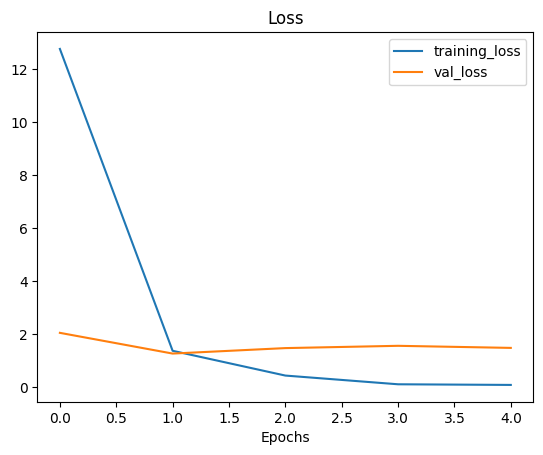

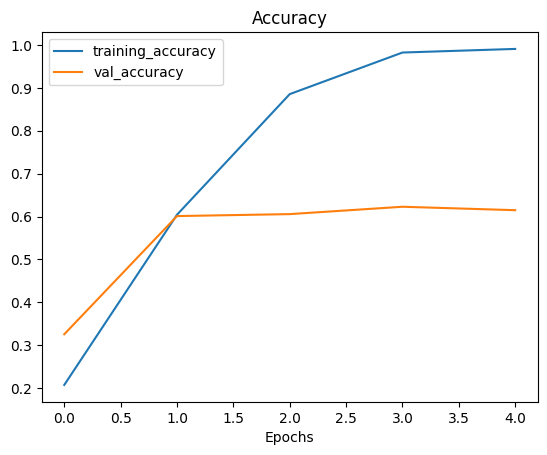

In [ ]:
plot_loss_curves(history_1)

## Clearly it is getting overfitted after 3rd epoch

# We can try using transfer learning as well

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

IMAGE_SHAPE = (224,224)

def create_model(model_url, num_classes=10):
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data)
                                  )

Epoch 1/5
71/71 [==============================] - 208s 3s/step - loss: 0.6503 - accuracy: 0.8073 - val_loss: 0.8101 - val_accuracy: 0.7466
Epoch 2/5
71/71 [==============================] - 203s 3s/step - loss: 0.6305 - accuracy: 0.8042 - val_loss: 0.8164 - val_accuracy: 0.7328
Epoch 3/5
71/71 [==============================] - 204s 3s/step - loss: 0.6168 - accuracy: 0.8090 - val_loss: 0.8023 - val_accuracy: 0.7431
Epoch 4/5
71/71 [==============================] - 215s 3s/step - loss: 0.6024 - accuracy: 0.8165 - val_loss: 0.7912 - val_accuracy: 0.7626
Epoch 5/5
71/71 [==============================] - 204s 3s/step - loss: 0.5837 - accuracy: 0.8276 - val_loss: 0.7757 - val_accuracy: 0.7523


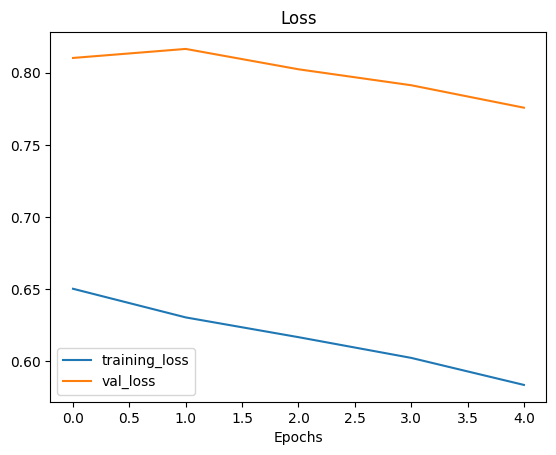

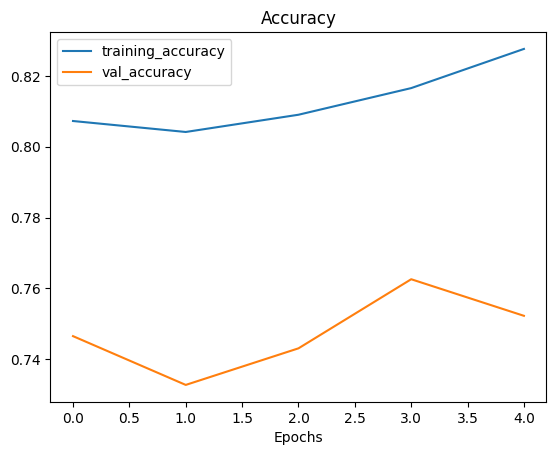

In [ ]:
plot_loss_curves(resnet_history)

# Trying performance of efficientnet

In [ ]:
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [ ]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
efficientnet_history = efficientnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data)
                                  )

Epoch 1/5
66/66 [==============================] - 105s 1s/step - loss: 1.7778 - accuracy: 0.4026 - val_loss: 1.4244 - val_accuracy: 0.5775
Epoch 2/5
66/66 [==============================] - 86s 1s/step - loss: 1.3332 - accuracy: 0.5816 - val_loss: 1.2064 - val_accuracy: 0.5932
Epoch 3/5
66/66 [==============================] - 84s 1s/step - loss: 1.1853 - accuracy: 0.6329 - val_loss: 1.0953 - val_accuracy: 0.6572
Epoch 4/5
66/66 [==============================] - 107s 2s/step - loss: 1.1067 - accuracy: 0.6507 - val_loss: 1.0308 - val_accuracy: 0.6814
Epoch 5/5
66/66 [==============================] - 82s 1s/step - loss: 1.0498 - accuracy: 0.6679 - val_loss: 0.9841 - val_accuracy: 0.6927


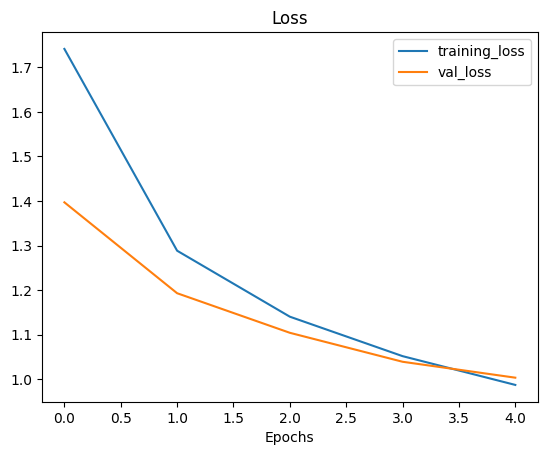

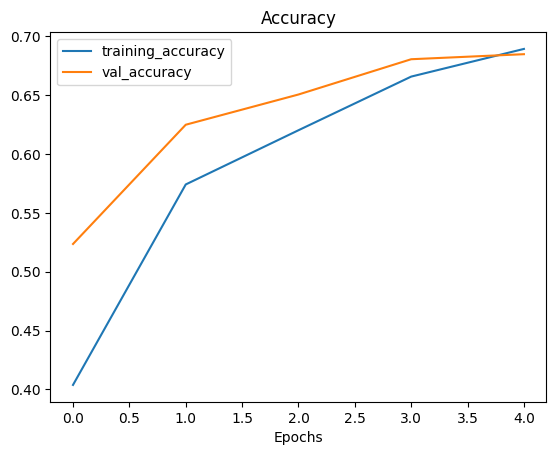

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_history2 = efficientnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data)
                                  )

Epoch 1/10
66/66 [==============================] - 95s 1s/step - loss: 1.0038 - accuracy: 0.6852 - val_loss: 0.9526 - val_accuracy: 0.7027
Epoch 2/10
66/66 [==============================] - 80s 1s/step - loss: 0.9716 - accuracy: 0.6823 - val_loss: 0.9172 - val_accuracy: 0.7098
Epoch 3/10
66/66 [==============================] - 83s 1s/step - loss: 0.9463 - accuracy: 0.6977 - val_loss: 0.8936 - val_accuracy: 0.7155
Epoch 4/10
66/66 [==============================] - 79s 1s/step - loss: 0.9183 - accuracy: 0.7102 - val_loss: 0.8790 - val_accuracy: 0.7226
Epoch 5/10
66/66 [==============================] - 98s 1s/step - loss: 0.8930 - accuracy: 0.7159 - val_loss: 0.8850 - val_accuracy: 0.7041
Epoch 6/10
66/66 [==============================] - 79s 1s/step - loss: 0.8799 - accuracy: 0.7202 - val_loss: 0.8504 - val_accuracy: 0.7397
Epoch 7/10
66/66 [==============================] - 85s 1s/step - loss: 0.8738 - accuracy: 0.7202 - val_loss: 0.8431 - val_accuracy: 0.7283
Epoch 8/10
66/66 [==

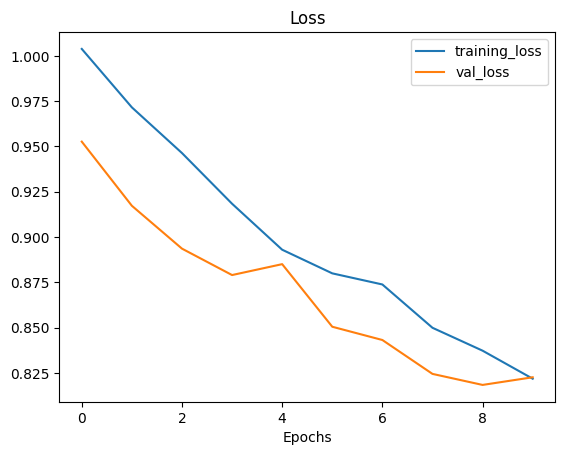

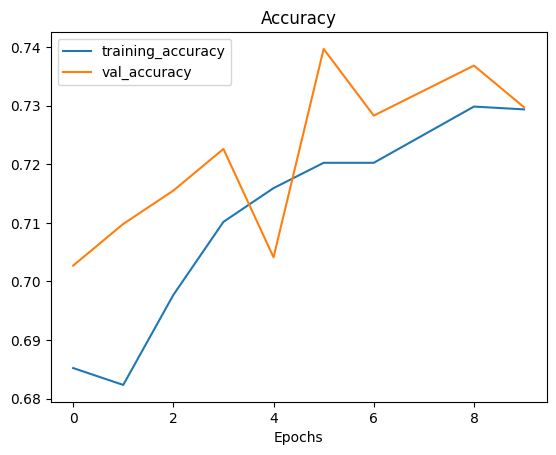

In [ ]:
plot_loss_curves(efficientnet_history2)

In [ ]:
efficientnet_history3 = efficientnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data)
                                  )

Epoch 1/5
66/66 [==============================] - 88s 1s/step - loss: 0.8100 - accuracy: 0.7433 - val_loss: 0.8039 - val_accuracy: 0.7425
Epoch 2/5
66/66 [==============================] - 109s 2s/step - loss: 0.7917 - accuracy: 0.7442 - val_loss: 0.7872 - val_accuracy: 0.7383
Epoch 3/5
66/66 [==============================] - 88s 1s/step - loss: 0.7803 - accuracy: 0.7558 - val_loss: 0.7758 - val_accuracy: 0.7440
Epoch 4/5
66/66 [==============================] - 83s 1s/step - loss: 0.7779 - accuracy: 0.7433 - val_loss: 0.7813 - val_accuracy: 0.7482
Epoch 5/5
66/66 [==============================] - 89s 1s/step - loss: 0.7674 - accuracy: 0.7514 - val_loss: 0.7791 - val_accuracy: 0.7368


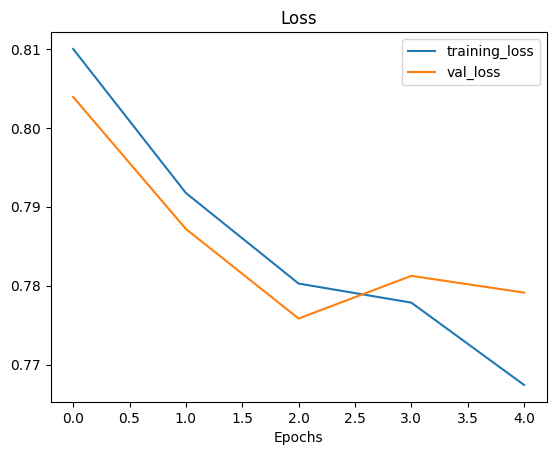

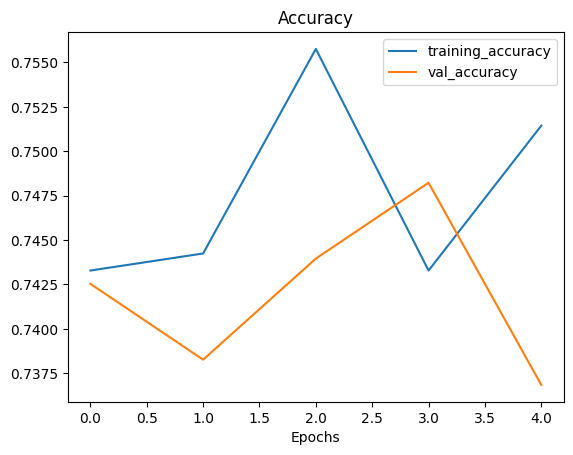

In [ ]:
plot_loss_curves(efficientnet_history3)

# Visualising training after 20 total epochs

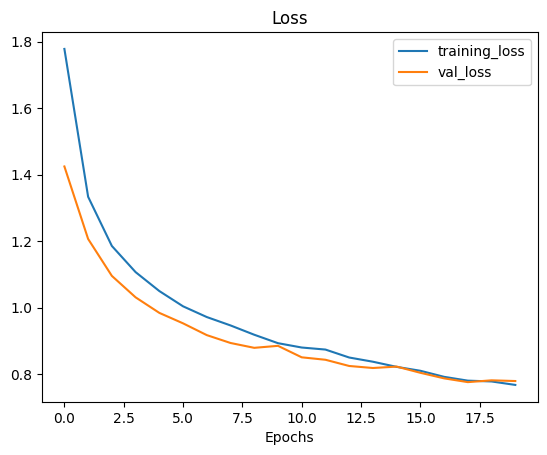

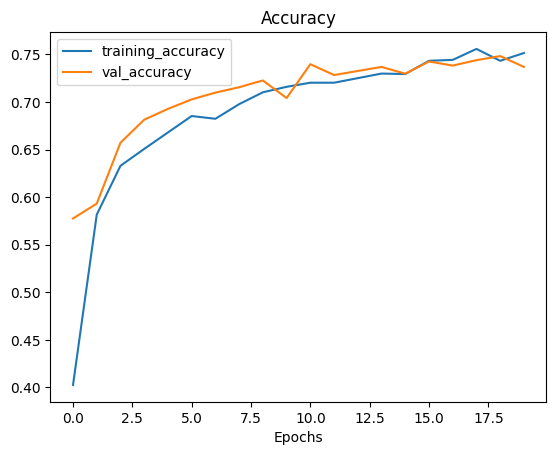

In [ ]:
loss = efficientnet_history.history['loss'] + efficientnet_history2.history['loss'] + efficientnet_history3.history['loss']
val_loss = efficientnet_history.history['val_loss'] + efficientnet_history2.history['val_loss'] + efficientnet_history3.history['val_loss']

accuracy = efficientnet_history.history['accuracy'] + efficientnet_history2.history['accuracy'] + efficientnet_history3.history['accuracy']
val_accuracy = efficientnet_history.history['val_accuracy'] + efficientnet_history2.history['val_accuracy'] + efficientnet_history3.history['val_accuracy']

epochs = range(20)

  # Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

  # Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()


In [ ]:
efficientnet_model.evaluate(test_data)

22/22 [==============================] - 21s 941ms/step - loss: 0.8331 - accuracy: 0.7324


[0.8331284523010254, 0.7323740720748901]